In [2510]:
## Problem definition :
## To predict charges of insurance based on some inputs (age, sex, bmi, children, smoker, region)

In [2527]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2511]:
insurance =pd.read_csv("D:\Sho4l\AI robotics\Task1\Task1\insurance.csv")## Reading csv file and convert to data frame
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2512]:
def replace(feature):
    values = insurance[feature].unique() #to replace every string to int value
    for i in range (len(values)):           
        insurance[feature]=insurance[feature].replace(to_replace=values[i],value=i)
replace("sex")
replace("smoker")
replace("region")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,2,10600.54830
1334,18,0,31.920,0,1,3,2205.98080
1335,18,0,36.850,0,1,1,1629.83350
1336,21,0,25.800,0,1,0,2007.94500


In [2513]:
x = insurance.drop("charges",axis=1).values #to make train data without lables in array
print(x)
print(x.shape)

[[19.    0.   27.9   0.    0.    0.  ]
 [18.    1.   33.77  1.    1.    1.  ]
 [28.    1.   33.    3.    1.    1.  ]
 ...
 [18.    0.   36.85  0.    1.    1.  ]
 [21.    0.   25.8   0.    1.    0.  ]
 [61.    0.   29.07  0.    0.    2.  ]]
(1338, 6)


In [2514]:
y = insurance["charges"].values # to make lables without inputs in array
y= y.reshape(len(y),1)
print(y.shape)


(1338, 1)


In [2515]:
#### when try to split data to train and test but accuracy so bad ###
# x_test = insurance.tail(400).drop("charges",axis=1).values #choose data to using in test
# x_test

In [2516]:
# y_test = insurance["charges"].tail(400).values
# y_test

In [2517]:
def init_w(data) : #function to initialize w with zeros
    w=np.zeros((data.shape[1],1)) #to make dimension of w to be acceptable to mul with data
    return w
b=0 # initialzie b with zero


In [2518]:

def normalization(x): #to improve accuracy without normalization r2 is 0.09 with normalization is 0.75
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    x_normalized = ((x - mean) / std)
    return x_normalized,mean,std

In [2519]:
def cost_fun (y_hat,y_true): ## function to compute cost function
    error = y_true-y_hat    
    mean_sware_error=error**2
    cost_function=(np.mean(mean_sware_error))*0.5
    return cost_function,error

In [2520]:
def gradient(x,errorr,alpha,w,y,b): #function to compute weight and bais
    dw = -(np.dot(x.T,errorr))/len(y)   ## make transpose for x to can mul in y_true minus y_hat
    db = -np.mean(errorr)
    w = w - alpha*(dw.reshape(-1,1)) ## to make shape of w (6,1)
    b = b - alpha*db
    return w,b

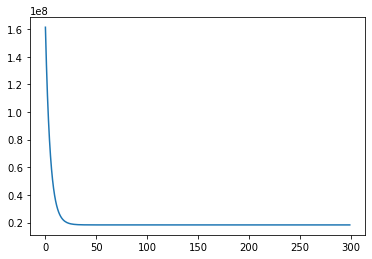

In [2521]:
normalized_x,mean ,stda=normalization(x)    ## compuet normalization of x 
w=init_w(normalized_x)                      ## compute weight
iterations=300
cost = []                                   ## make two lists to plot change cost function with each iteration 
itere =[]
for i in range (iterations):
    y_hat=(np.dot(normalized_x,w))+b
    cost_function,error=cost_fun(y_hat,y)
    cost.append(cost_function)              ## update list with new value of cost function
    itere.append(i)                         ## update list with new value of iteration
    w,b = gradient(normalized_x,error,0.1,w,y,b) ## update values of w,b
plt.plot(itere,cost)    

In [2522]:
## to compute y_predict through using equation 
## y = wx + b
y_predict = (np.dot(normalized_x,w))+b      
y_predict

array([[25111.24186363],
       [ 3687.60517284],
       [ 6963.14570669],
       ...,
       [ 4363.66236622],
       [ 1106.98661296],
       [37013.72809551]])

Text(0.5, 1.0, 'Actual vs Predicted insurances')

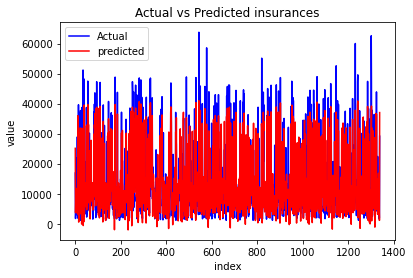

In [2523]:
##plot to show how much predicted value far from true value
plt.plot(y, color='blue', label='Actual') 
plt.plot(y_predict, color='red', label='predicted')
plt.legend()
plt.xlabel('index')
plt.ylabel('value')
plt.title('Actual vs Predicted insurances')



(array([325.,   0.,   0., 364.,   0.,   0., 325.,   0.,   0., 324.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

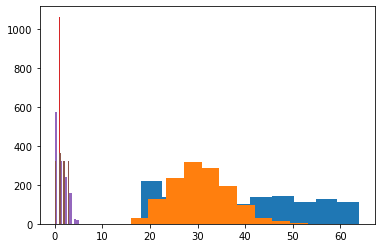

In [2524]:
## to show if features is normal or not
plt.hist(insurance['age'])
plt.hist(insurance['bmi'])
plt.hist(insurance['sex'])
plt.hist(insurance['smoker'])
plt.hist(insurance['children'])
plt.hist(insurance['region'])

In [2525]:
##  r^2 =1 - ∑ ( y i - y i ^ ) 2 ∑ ( y i - y¯ ) 2 ## 
## equation of r^2 score 

In [2526]:
r= 1-((np.mean((y-y_predict)**2))/np.mean((y-np.mean(y))**2)) ## compuet r2 from its eqation
r

0.7507372027994937